# Biodata Mahasiswa
## Praktikum Pekan 10 : Klasifikasi  menggunakan model Decision Tree pada IMDB Dataset

VSI2J3 - Dasar Ilmu Data

NIM: 607012300120

Nama: Ilham Setiawan Siregar

Kelas: D3SI-47-04

# Deskripsi contoh

Colab berikut merupakan contoh untuk memprediksi sentimen (positif/negatif) dari ulasan film berdasarkan teks ulasan. Prediksi akan dilakukan dengan cara klasifikasi, yang dapat dilakukan dengan 1 method, yaitu:
1. Klasifikasi (Classification). Klasifikasi yang akan digunakan pada colab ini adalah Neural Network (NN).

* Prediksi didasarkan pada dua kategori, yaitu: ```positive``` dan ```negative```.
* Dataset akan diambil dari dataset ```IMDB Dataset.csv```
* Dataset tersebut memiliki 1 fitur dan 1 label.
* Fiturnya adalah review.
  - review adalah teks ulasan dari kritikus film.

# Tahapan code untuk persiapan data
1. Koneksi colab dengan GDrive
2. Tampilkan isi folder dataset_ilmu_data
3. Import library yang dibutuhkan
4. Load dataset
5. Tampilkan contoh data

## Koneksi colab dengan GDrive





In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Import library untuk manipulasi data
import pandas as pd

# Import library untuk membagi dataset menjadi training dan testing set
from sklearn.model_selection import train_test_split

# Import library untuk mengubah teks menjadi fitur numerik
from sklearn.feature_extraction.text import TfidfVectorizer

# Import library untuk model Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Import library untuk evaluasi model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Import library untuk visualisasi (opsional)
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [ ]:
#load data google drive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv')
print (df.shape)

(50000, 2)


## Tampilkan contoh data

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Pemeriksaan missing values atau duplikasi dalam dataset

In [ ]:
# 1. Pemeriksaan Missing Values
print("=== PEMERIKSAAN MISSING VALUES ===")
print("Jumlah missing values per kolom:")
print(df.isnull().sum())

print("\nPersentase missing values per kolom:")
print(df.isnull().mean() * 100)

# 2. Pemeriksaan Data Duplikat
print("\n=== PEMERIKSAAN DATA DUPLIKAT ===")
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

# Jika ada duplikasi, kita bisa hapus duplikat seperti ini:
if jumlah_duplikat > 0:
    df = df.drop_duplicates()
    print(f"Setelah menghapus duplikat, jumlah data menjadi: {len(df)}")

# Menampilkan dimensi akhir dataset
print("\nDimensi dataset setelah pemeriksaan:")
print(df.shape)

=== PEMERIKSAAN MISSING VALUES ===
Jumlah missing values per kolom:
review       0
sentiment    0
dtype: int64

Persentase missing values per kolom:
review       0.0
sentiment    0.0
dtype: float64

=== PEMERIKSAAN DATA DUPLIKAT ===
Jumlah baris duplikat: 418
Setelah menghapus duplikat, jumlah data menjadi: 49582

Dimensi dataset setelah pemeriksaan:
(49582, 2)


# Klasifikasi menggunakan Decision Tree



### 1) Pilih fitur yang akan digunakan

Tahap ini sama dengan code di classification, yaitu memilih fitur dari dataset.

In [ ]:
# Memilih fitur dan label
X = df['review']  # Fitur: teks ulasan
y = df['sentiment']  # Label: sentimen (positive/negative)

# Tampilkan beberapa sampel fitur dan label
print("Sample Features (Reviews):")
print(X.head())
print("\nSample Labels (Sentiments):")
print(y.head())

Sample Features (Reviews):
0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
3    Basically there's a family where a little boy ...
4    Petter Mattei's "Love in the Time of Money" is...
Name: review, dtype: object

Sample Labels (Sentiments):
0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object


### 2) Lakukan pre-processing (jika diperlukan)

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK data (only need to do this once)
nltk.download('stopwords')
nltk.download('wordnet')

# Function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize text
    words = text.split()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join words back into a single string
    text = ' '.join(words)

    return text

# Apply preprocessing to the 'review' column
df['review'] = df['review'].apply(preprocess_text)

# Display the first few preprocessed reviews
print("Sample Preprocessed Reviews:")
print(df['review'].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Sample Preprocessed Reviews:
0    one reviewer mentioned watching oz episode you...
1    wonderful little production br br filming tech...
2    thought wonderful way spend time hot summer we...
3    basically family little boy jake think zombie ...
4    petter matteis love time money visually stunni...
Name: review, dtype: object


### 3) Bagi dataset menjasi data training dan data testing

Membagi dataset untuk data training dan data testing

In [ ]:
# Ekstraksi fitur menggunakan TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_tfidf = vectorizer.fit_transform(df['review']) # Changed 'data' to 'df'

# Membagi dataset menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Tampilkan jumlah data training dan testing
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (39665, 5000)
Testing set size: (9917, 5000)


## 4) Siapkan classifier, tentukan variabel dan parameter

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Menyiapkan classifier Decision Tree
clf = DecisionTreeClassifier(
    criterion='gini',  # Kriteria untuk mengukur kualitas split (opsi lain: 'entropy')
    max_depth=10,      # Maksimum kedalaman pohon (atur None untuk tidak membatasi kedalaman)
    min_samples_split=2,  # Minimum jumlah sampel yang diperlukan untuk split node
    min_samples_leaf=1,   # Minimum jumlah sampel yang diperlukan untuk menjadi leaf node
    random_state=42       # Seed untuk keperluan reproduktifitas
)


# Variabel yang digunakan
X_train = X_train  # Fitur training
y_train = y_train  # Label training
X_test = X_test    # Fitur testing
y_test = y_test    # Label testing

## 5) Training classifier pada dataset



In [ ]:
# Melatih model menggunakan data training
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

## 6) Lakukan pengujian dengan data uji



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Membuat prediksi menggunakan data testing
y_pred = clf.predict(X_test)


In [ ]:
# Menampilkan 10 prediksi pertama dan label aktual
print("10 prediksi pertama dan label aktual:")
for i in range(10):
    print(f"Prediksi: {y_pred[i]}, Aktual: {y_test.iloc[i]}")

10 prediksi pertama dan label aktual:
Prediksi: negative, Aktual: negative
Prediksi: negative, Aktual: positive
Prediksi: positive, Aktual: negative
Prediksi: negative, Aktual: negative
Prediksi: positive, Aktual: positive
Prediksi: positive, Aktual: positive
Prediksi: negative, Aktual: negative
Prediksi: positive, Aktual: negative
Prediksi: negative, Aktual: negative
Prediksi: positive, Aktual: positive


## 7) Analisa performansi model


### a) Menggunakan accuracy score

In [ ]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7180598971463145


### b) Menggunakan Confusion Matrix

In [ ]:
# 2. Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[2975 1964]
 [ 832 4146]]


### c) Menggunakan Classification Report

In [ ]:
# 3. Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    negative       0.78      0.60      0.68      4939
    positive       0.68      0.83      0.75      4978

    accuracy                           0.72      9917
   macro avg       0.73      0.72      0.71      9917
weighted avg       0.73      0.72      0.71      9917



## 8) Menampilkan plot tree

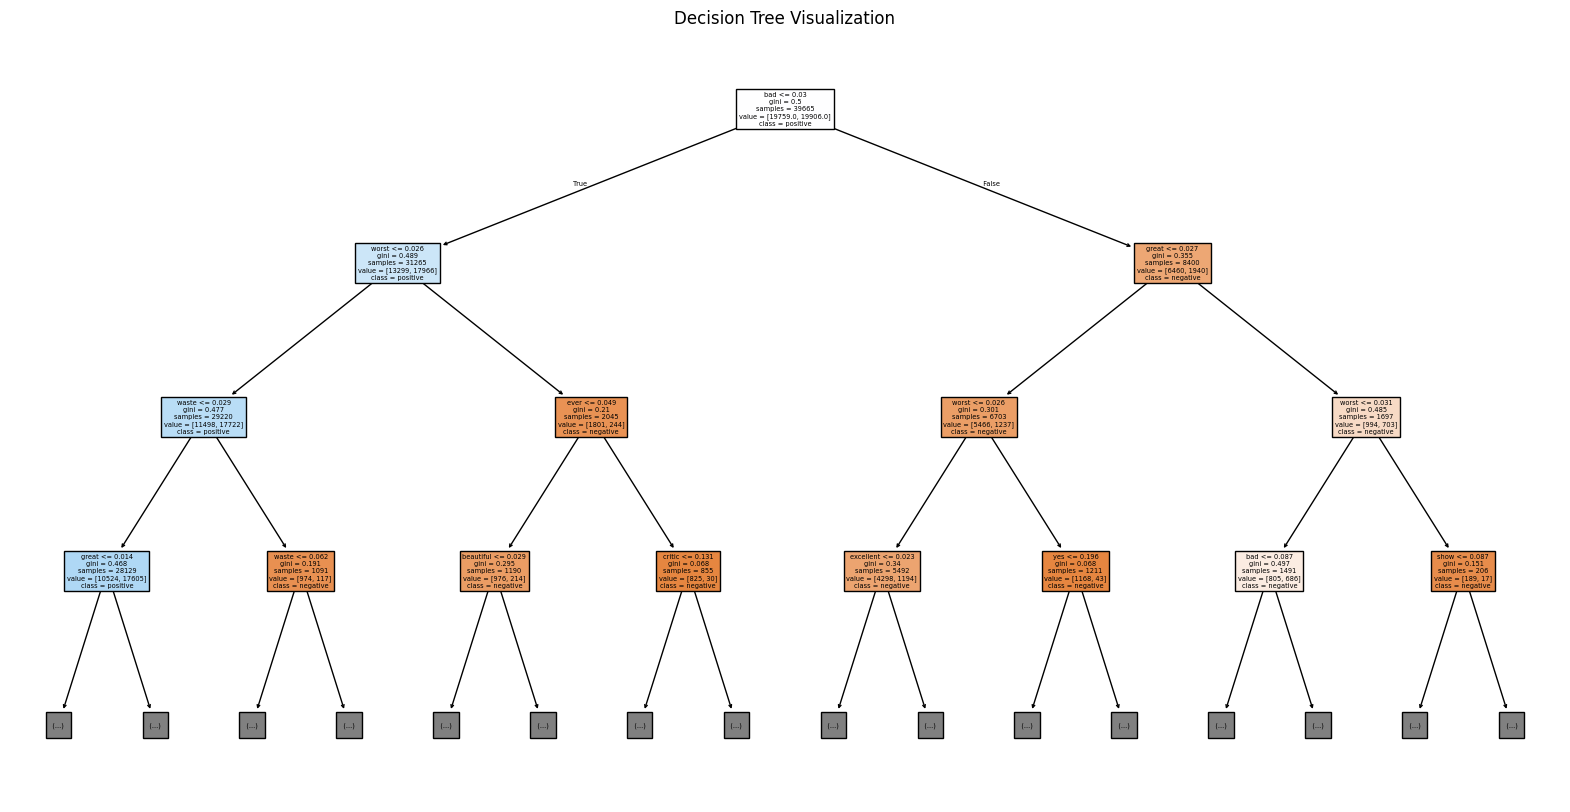

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Menampilkan plot Decision Tree
plt.figure(figsize=(20, 10))  # Atur ukuran gambar
plot_tree(clf, filled=True, feature_names=vectorizer.get_feature_names_out(), class_names=['negative', 'positive'], max_depth=3)
plt.title("Decision Tree Visualization")
plt.show()

## 9) Kesimpulan sebelum HPO

Model Decision Tree saat ini telah menunjukkan performa yang cukup baik dengan akurasi 71.81%. Namun, masih ada ruang untuk perbaikan, terutama dalam mengurangi jumlah false positives dan meningkatkan recall untuk kelas negative. Dengan melakukan Hyperparameter Optimization (HPO) menggunakan RandomizedSearchCV, diharapkan dapat menemukan kombinasi parameter yang lebih optimal untuk meningkatkan performa model. Selain itu, HPO juga dapat membantu dalam menemukan parameter yang lebih efisien dalam hal waktu pelatihan dan prediksi, serta mengurangi kompleksitas model tanpa mengorbankan performa.

## 10) Optimasi: HPO dengan RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Parameter grid untuk RandomizedSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [42]
}

# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=param_grid,
    n_iter=100,  # Jumlah iterasi acak
    cv=5,        # Jumlah fold untuk cross-validation
    verbose=2,   # Tingkat kebisingan output
    random_state=42,
    n_jobs=-1    # Menggunakan semua core prosesor
)

# Melakukan pencarian hyperparameter
random_search.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

# Menggunakan model terbaik untuk prediksi
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Mengevaluasi model terbaik
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy of the best model:", accuracy_best)
print("Classification Report of the best model:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix of the best model:\n", confusion_matrix(y_test, y_pred_best))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20, 'criterion': 'gini'}
Best cross-validation score:  0.7351821505105256
Accuracy of the best model: 0.7217908641726328
Classification Report of the best model:
               precision    recall  f1-score   support

    negative       0.77      0.63      0.69      4939
    positive       0.69      0.82      0.75      4978

    accuracy                           0.72      9917
   macro avg       0.73      0.72      0.72      9917
weighted avg       0.73      0.72      0.72      9917

Confusion Matrix of the best model:
 [[3099 1840]
 [ 919 4059]]


## 11) Implementasi best parameter pada model

Siapkan classifier ke 2 dan tentukan variabel/parameternya

In [ ]:
# Code untuk classifier ke 2

# Implementasi best parameter pada model
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

# Siapkan classifier dengan best parameters
clf_best = DecisionTreeClassifier(
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    random_state=42
)

Best parameters found:  {'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 20, 'criterion': 'gini'}


## 12) Lakukan proses training dengan data latih

In [ ]:
# Code training pada classifier ke 2

# Melatih model dengan data training
clf_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=2, random_state=42)

## 13) Lakukan pengujian dengan data uji

In [ ]:
# Code pengujian pada data test menggunakan classifier ke
# Membuat prediksi menggunakan data testing
y_pred_best = clf_best.predict(X_test)

# Menampilkan 10 prediksi pertama dan label aktual
print("10 prediksi pertama dan label aktual:")
for i in range(10):
    print(f"Prediksi: {y_pred_best[i]}, Aktual: {y_test.iloc[i]}")

10 prediksi pertama dan label aktual:
Prediksi: negative, Aktual: negative
Prediksi: positive, Aktual: positive
Prediksi: positive, Aktual: negative
Prediksi: negative, Aktual: negative
Prediksi: positive, Aktual: positive
Prediksi: negative, Aktual: positive
Prediksi: negative, Aktual: negative
Prediksi: positive, Aktual: negative
Prediksi: positive, Aktual: negative
Prediksi: positive, Aktual: positive


## 14) Analisa performansi model setelah HPO

### a) Menggunakan accuracy score

In [ ]:
# Code analisa performansi menggunakan accuracy score

accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy of the best model:", accuracy_best)

Accuracy of the best model: 0.7217908641726328


### b) Menggunakan Confusion Matrix

In [ ]:
# Code analisa performansi menggunakan confusion matrix
print("Confusion Matrix of the best model:\n", confusion_matrix(y_test, y_pred_best))

Confusion Matrix of the best model:
 [[3099 1840]
 [ 919 4059]]


### c) Menggunakan Classification Report

In [ ]:
# Code analisa performansi menggunakan classification report
print("Classification Report of the best model:\n", classification_report(y_test, y_pred_best))

Classification Report of the best model:
               precision    recall  f1-score   support

    negative       0.77      0.63      0.69      4939
    positive       0.69      0.82      0.75      4978

    accuracy                           0.72      9917
   macro avg       0.73      0.72      0.72      9917
weighted avg       0.73      0.72      0.72      9917



## 15) Kesimpulan setelah HPO

Setelah melakukan Hyperparameter Optimization (HPO) dengan RandomizedSearchCV, model Decision Tree Anda telah menunjukkan peningkatan dalam performa. Akurasi model meningkat dari 71.81% menjadi 72.18%, dan metrik lainnya seperti precision, recall, dan F1-score juga menunjukkan perbaikan. Selain itu, model terbaik yang ditemukan memiliki parameter yang lebih optimal, yang dapat membantu dalam meningkatkan performa model.
Meskipun peningkatan performa tidak sangat signifikan, HPO telah membantu dalam menemukan kombinasi parameter yang lebih baik. Selanjutnya, Anda dapat mencoba teknik tuning yang lebih lanjut, seperti menggunakan lebih banyak data atau mencoba model yang berbeda, untuk mencapai performa yang lebih tinggi.